In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# OS 확인
if platform.system() == 'Windows':
    font_name = 'Malgun Gothic'  # 윈도우 기본 한글 폰트
elif platform.system() == 'Darwin':  # Mac
    font_name = 'AppleGothic'
else:
    font_name = 'NanumGothic'  # Linux 환경이면 설치 필요

plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지


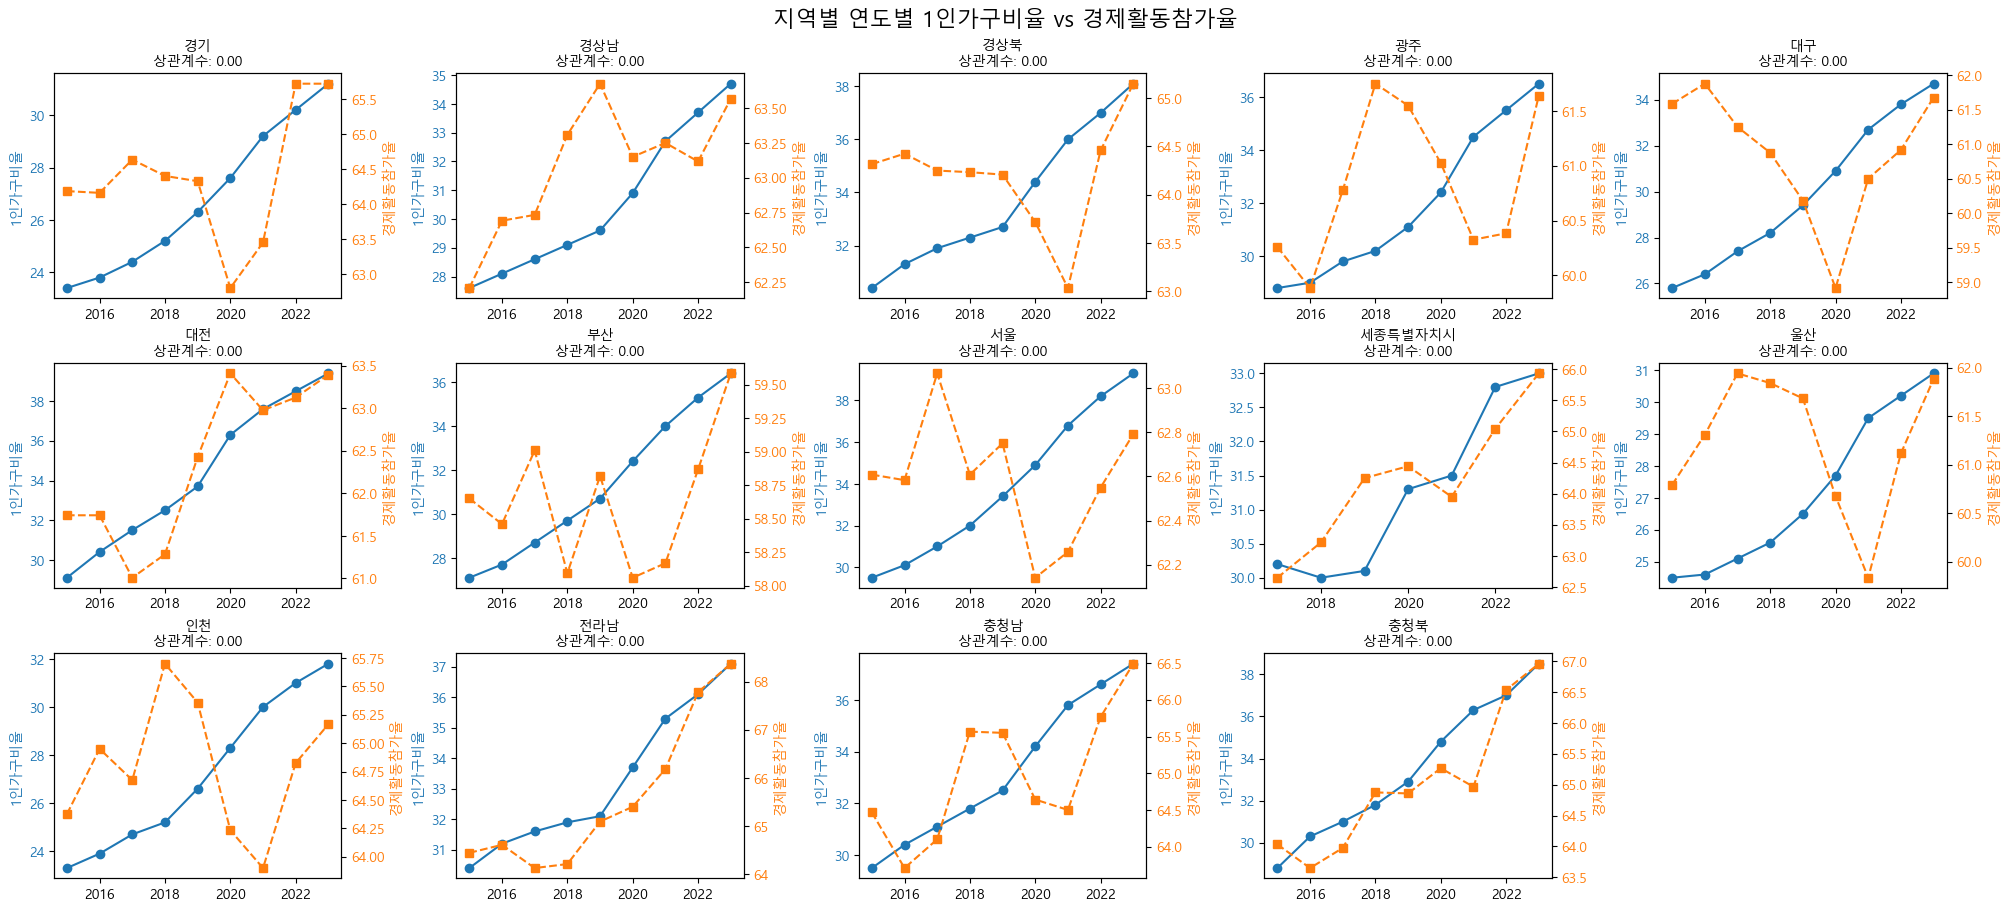

In [10]:

# CSV 불러오기
df = pd.read_csv("1인가구비율/1인가구_경제활동률병합.csv")



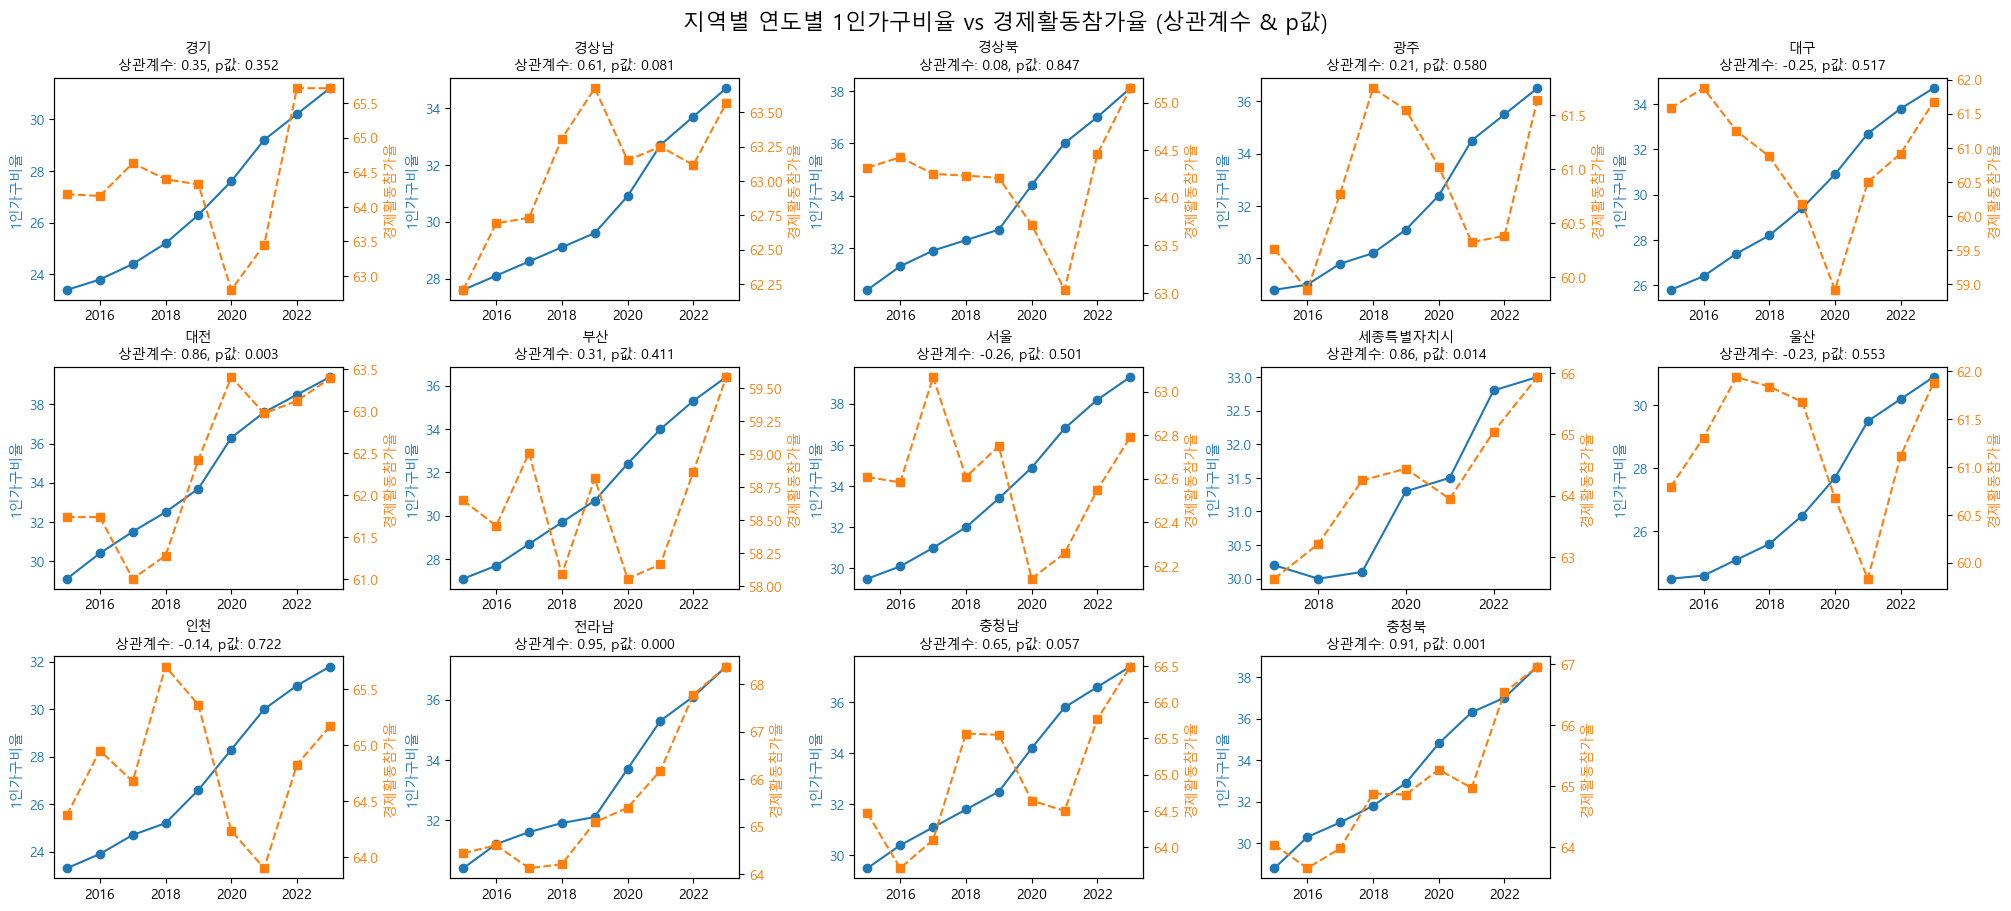

In [13]:
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt

# 상관계수와 p값 계산
count_by_region = df.groupby('시도')['연도'].nunique()
valid_regions = count_by_region[count_by_region >= 2].index
df_valid = df[df['시도'].isin(valid_regions)]

corr_map = {}
for region in valid_regions:
    region_df = df_valid[df_valid['시도'] == region]
    r, p = pearsonr(region_df['1인가구비율'], region_df['경제활동참가율'])
    corr_map[region] = (r, p)

# 시각화
regions = sorted(valid_regions)
n_rows = (len(regions) + 4) // 5

fig, axes = plt.subplots(n_rows, 5, figsize=(20, n_rows * 3), constrained_layout=True)
axes = axes.flatten()

for idx, region in enumerate(regions):
    ax = axes[idx]
    region_df = df_valid[df_valid['시도'] == region].sort_values(by='연도')
    ax2 = ax.twinx()

    # 왼쪽 Y축: 1인가구비율
    ax.plot(region_df['연도'], region_df['1인가구비율'], 'o-', color='tab:blue')
    ax.set_ylabel('1인가구비율', color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')

    # 오른쪽 Y축: 경제활동참가율
    ax2.plot(region_df['연도'], region_df['경제활동참가율'], 's--', color='tab:orange')
    ax2.set_ylabel('경제활동참가율', color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    # 상단 제목: 상관계수 + p값
    r, p = corr_map.get(region, (None, None))
    if r is not None:
        title = f"{region}\n상관계수: {r:.2f}, p값: {p:.3f}"
    else:
        title = f"{region}\n상관계수: N/A"
    ax.set_title(title, fontsize=10)

# 빈 subplot 제거
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('지역별 연도별 1인가구비율 vs 경제활동참가율 (상관계수 & p값)', fontsize=16)
plt.show()
